In [6]:
import pandas as pd
from gensim.models import KeyedVectors
import gensim

In [7]:
google_model = KeyedVectors.load_word2vec_format('D:/Khalil/university/cross/GoogleNews-vectors-negative300.bin',binary = True)

In [8]:
google_model.most_similar('Joule')

[('organisms_secrete', 0.4530004858970642),
 ('Virent', 0.44149625301361084),
 ('Joule_Unlimited', 0.4261224865913391),
 ('LiveFuels', 0.4144062399864197),
 ('Enerpulse', 0.4121578335762024),
 ('A1_e_tron', 0.39691483974456787),
 ('Transphorm', 0.39669525623321533),
 ('ElectroChem', 0.39435678720474243),
 ('Pulstar', 0.3942970931529999),
 ('scientist_Philip_Pienkos', 0.3925151228904724)]

In [9]:
#This method will calculate the similarity score for us
def get_jaccard_similarity(S1,S2):
    if len(S1) == 0 and len(S2) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / len(S1.union(S2))
#This method will calculate the similarity score for us
def get_dice_similarity(S1,S2):
    if len(S1) == 0 and len(S2) == 0:
        return 0
    else:
        return 2 * ( len(S1.intersection(S2)) / (len(S1) + len(S2)))
#This method will calculate the similarity score for us
def get_overlap_similarity(S1,S2):
    if len(S1) == 0 or len(S2) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / min((len(S1) , len(S2)))
#This method will calculate the similarity score for us
def get_containment_similarity(S1,S2):
    if len(S1) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / len(S1)

In [10]:
def get_augmented_google_set_different_length(word):
    list_output = get_augmented_google_list(word)
    return  [set  (list_output[:1]), set (list_output[:2]),
             set ( list_output[:3]) , set ( list_output[:4]) ,
             set ( list_output[:5]) , set ( list_output) ]

def get_augmented_google_list(word):
    word = word.lower()
    list_of_word = []
    data_from_google_model = []
    try: 
        data_from_google_model = google_model.most_similar(word)
    except:
        data_from_google_model = []
        
    for sim_set in data_from_google_model:
        list_of_word.append(sim_set[0])
    # print(list_of_word)
    # print(set(list_of_word))
    list_of_word = [item.lower() for item in list_of_word]
    list_of_word = [x for x in list_of_word if x != word]
    return list_of_word

In [11]:
def get_augmented_google_set(word):
    word = word.lower()
    list_of_word = []
    data_from_google_model = []
    try: 
        data_from_google_model = google_model.most_similar(word)
    except:
        data_from_google_model = []
        
    for sim_set in data_from_google_model:
        list_of_word.append(sim_set[0])
    # print(list_of_word)
    # print(set(list_of_word))
    list_of_word = [item.lower() for item in list_of_word]
    list_of_word = [x for x in list_of_word if x != word]
    return set(list_of_word)

In [12]:
def get_google_similarity(W1 , W2):
    try: 
        return google_model.similarity(W1,W2)
    except:
        return 0

In [21]:
eng_word1_aug = get_augmented_google_set_different_length("English")
eng_word1_aug

[{'institute_itri_eng'},
 {'institute_itri_eng', 'spanish'},
 {'grammer', 'institute_itri_eng', 'spanish'},
 {'grammer', 'institute_itri_eng', 'japanese', 'spanish'},
 {'french', 'grammer', 'institute_itri_eng', 'japanese', 'spanish'},
 {'american',
  'dutch',
  'england',
  'french',
  'grammer',
  'institute_itri_eng',
  'japanese',
  'lyk',
  'spanish'}]

In [18]:
given_data = pd.read_excel('Cross Lingual dataset.xlsx')
given_data.shape

(1000, 4)

In [19]:
given_data.head()

,Word 1,Word 2,score,Word 2 Translation
0,Joule,خلائی جہاز,0.58,spacecraft
1,Promised Land,باکو,0.42,Baku
2,car,سائیکل,2.83,bicycle
3,polyhedron,اداکار,0.00,actor
4,multiple sclerosis,ایم ایس,3.92,MS


In [20]:
for i in range(1 , 7):
#     print("English Word 1 AL" + i)
    given_data[ "English Word 1 AL"+str(i) ] = ''
    given_data[ "English Word 2 AL"+str(i) ] = ''
    given_data['Jaccard A'+str(i)] = ''
    given_data['Dice A'+str(i)] = ''
    given_data['Overlap A'+str(i)] = ''
    given_data['Containment A'+str(i)] = ''
given_data.head()

,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,Containment A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,Joule,خلائی جہاز,0.58,spacecraft,,,,,,,...,,,,,,,,,,
1,Promised Land,باکو,0.42,Baku,,,,,,,...,,,,,,,,,,
2,car,سائیکل,2.83,bicycle,,,,,,,...,,,,,,,,,,
3,polyhedron,اداکار,0.00,actor,,,,,,,...,,,,,,,,,,
4,multiple sclerosis,ایم ایس,3.92,MS,,,,,,,...,,,,,,,,,,


In [21]:
for index, row in given_data.iterrows():
    print (index ,row["Word 1"], row["Word 2 Translation"] )

0 Joule spacecraft
1 Promised Land Baku
2 car bicycle
3 polyhedron actor
4 multiple sclerosis MS
5 fault system
6 weapon helmet
7 screenwriter television
8 United Nations Ban Ki-moon
9 Si-o-seh pol Mathematical Bridge
10 basilica mosaic
11 watercolor painting brush
12 democracy monarchy
13 Gauss scientist
14 tuberculosis LED
15 self-driving car autonomous car
16 apocalypse fire
17 speed post
18 PlayStation Wii
19 laptop notebook
20 Harry Potter wizard
21 snowboard skiing
22 pointer slide
23 sensor radiator
24 hit frame
25 theory hypothesis
26 Wall Street financial market
27 Darwin evolution
28 actor actress
29 film theatre
30 national anthem patriotism
31 screen monitor
32 dairy honey
33 Mount Everest Chomolungma
34 tug of war Snakes and Ladders
35 pesticide pest
36 policeman politician
37 neuropsychology parapsychology
38 battery energy
39 Legion of Honour stationery
40 Spider-Man street
41 peninsula island
42 equator Ecuador
43 chart graph
44 simulation robotics
45 Nike Adidas
46 soc

584 beauty sonnet
585 office worker
586 exchange currency
587 cotton polyester
588 justice tribunal
589 rear tail
590 book accident
591 wind squall
592 harmony piano
593 ministry sultan
594 dune desert
595 division multiplication
596 blood virus
597 statute ice age
598 environment sword
599 pen elementary school
600 supporter cricket
601 statue sculpture
602 Mozilla Firefox web browser
603 Canon Fox Terrier
604 Britain HSBC
605 Gospel Bible
606 dance dress
607 list array
608 lock-up cell
609 homework essay
610 machine computer
611 polar bear panda
612 mind neurosis
613 monkey campaign
614 rucksack Faraday constant
615 skyscraper palace
616 plane helicopter
617 Oxford University University of Cambridge
618 pole flag
619 roof window
620 frisbee card game
621 worm malware
622 star planet
623 athlete runner
624 umbrella caliber
625 WikiLeaks WiFi
626 water drought
627 piece airport
628 band orchestra
629 mohito mojito
630 exam syllabus
631 theory theorem
632 toy yo-yo
633 rain blizzard
634

In [22]:
# given_data.at[1 , "English Word 1 Augmentation"]  = ''
for index, row in given_data.iterrows():
    print(index)
    eng_word1_aug = get_augmented_google_set_different_length(row["Word 1"])
    eng_word2_aug = get_augmented_google_set_different_length(row["Word 2 Translation"])
    
    for i in range(len(eng_word1_aug)):
    
        given_data.at[index , "English Word 1 AL" + str(i +1)] = ",".join(list(eng_word1_aug[i]))
        given_data.at[index , "English Word 2 AL" + str(i +1)] = ",".join(list(eng_word2_aug[i]))

        given_data.at[index , 'Jaccard A'+str(i + 1)] = 4 * get_jaccard_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Dice A'+str(i + 1)] = 4 * get_dice_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Overlap A'+str(i + 1)] = 4 * get_overlap_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Containment A'+str(i + 1)] = 4 * get_containment_similarity(eng_word1_aug[i] , eng_word2_aug[i])



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [23]:
given_data.head()

,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,Containment A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,Joule,خلائی جہاز,0.58,spacecraft,joules,orbiter,0,0,0,0,...,0,0,0,0,"μw,megajoules,cm_-2,terawatt,absorption_coeffi...","orbit,nasa_spacecraft,lander,orbiting,orbiter,...",0,0,0,0
1,Promised Land,باکو,0.42,Baku,,,0,0,0,0,...,0,0,0,0,,,0,0,0,0
2,car,سائیکل,2.83,bicycle,vehicle,bike,0,0,0,0,...,0,0,0,0,"truck,vehicle,ford_focus,suv,jeep,pickup_truck...","skateboard,bicycling,motorcycle,bicycles,bikin...",0,0,0,0
3,polyhedron,اداکار,0.00,actor,dodecahedron,actress,0,0,0,0,...,0,0,0,0,"geometrical_shapes,polyhedrons,polyhedra,hexag...","thespian,funnyman,actors,thesp,entertainer,sha...",0,0,0,0
4,multiple sclerosis,ایم ایس,3.92,MS,,buy_microsoft,0,0,0,0,...,0,0,0,0,,"indesign,adobe_photoshop,oem,preis,purchase_au...",0,0,0,0


In [24]:
given_data.to_excel('dataset with similarity score after augmenting with google pre trained 1_2_3_4_5.xlsx')

In [25]:
print ( "Number of word1 not found = " ,len(given_data[given_data['English Word 1 AL1'] == '']))
print ( "Number of word2 not found = " ,len(given_data[given_data['English Word 2 AL1'] == '']))

Number of word1 not found =  155
Number of word2 not found =  155


In [26]:
import matplotlib.pyplot as plt

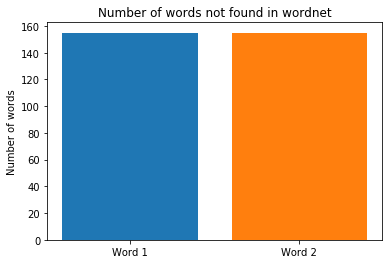

In [27]:
fig , ax = plt.subplots()

ax.bar(   'Word 1'  , len(given_data[given_data['English Word 1 AL1'] == '']) )
ax.bar(   'Word 2'  , len(given_data[given_data['English Word 2 AL1'] == '']))

# ax.legend()

plt.title('Number of words not found in wordnet')
# plt.xlabel('Number of Time words not found in wordnet')
plt.ylabel('Number of words')
plt.show()

In [28]:
print ( "Number of pairs having 0 similarity = " ,len(given_data[given_data['Jaccard A1'] == 0]))
print ( "Number of pairs having similarity except 0 = " ,len(given_data[given_data['Jaccard A1'] != 0]))

Number of pairs having 0 similarity =  998
Number of pairs having similarity except 0 =  2


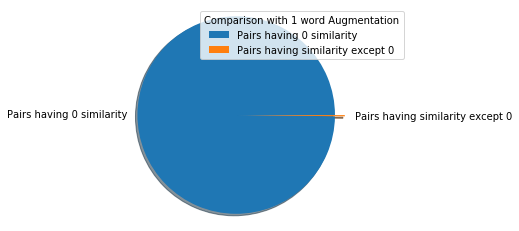

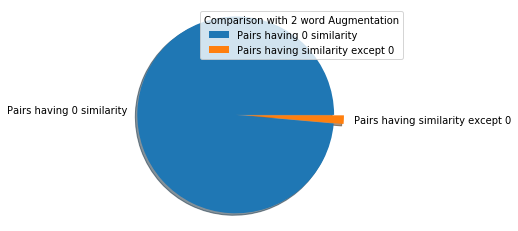

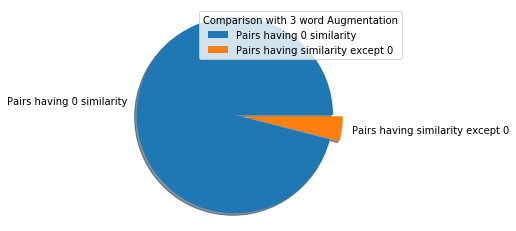

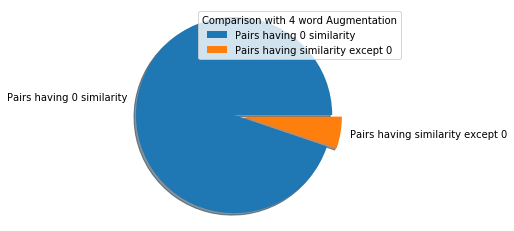

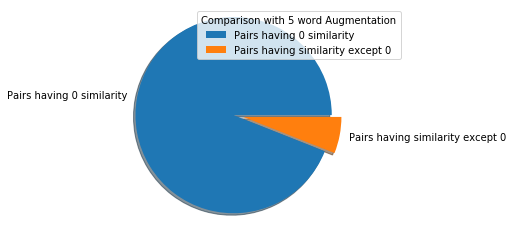

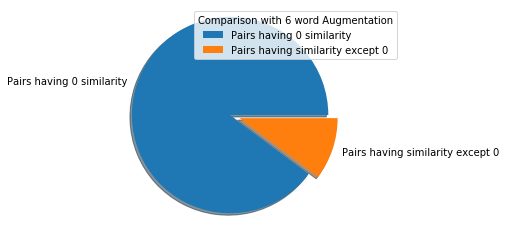

In [29]:
for i in range(1, 7):
    labels_text = ['Pairs having 0 similarity' , 'Pairs having similarity except 0']
    values = [len(given_data[given_data['Jaccard A' + str(i)] == 0]) , 
             len(given_data[given_data['Jaccard A' + str(i)] != 0])]
    explode_value = [0 , 0.1]
    plt.pie(values , explode = explode_value , labels = labels_text , shadow = True, startangle = 0 )
    plt.axis('equal')
    plt.legend(title = "Comparison with " + str(i)+ " word Augmentation")
    plt.show()

In [30]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from beautifultable import BeautifulTable

In [31]:
table = BeautifulTable()
table.column_headers = ["Data", "Number of zero similarity", "Number of non zero similarity"]
print("Google Pre-Trained")
print("Similarty using Jaccard")
for i in range(1 , 7):
    table.append_row([str(i) + " Word Augmentation",
                     len(given_data[given_data['Jaccard A' + str(i)] == 0]),
                     len(given_data[given_data['Jaccard A' + str(i)] != 0])])
print(table)

Google Pre-Trained
Similarty using Jaccard
+---------------------+-------------------------+------------------------------+
|        Data         | Number of zero similari | Number of non zero similarit |
|                     |           ty            |              y               |
+---------------------+-------------------------+------------------------------+
| 1 Word Augmentation |           998           |              2               |
+---------------------+-------------------------+------------------------------+
| 2 Word Augmentation |           986           |              14              |
+---------------------+-------------------------+------------------------------+
| 3 Word Augmentation |           960           |              40              |
+---------------------+-------------------------+------------------------------+
| 4 Word Augmentation |           948           |              52              |
+---------------------+-------------------------+-----------------

In [32]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Google Pre-Trained")
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Dice A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Overlap A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Containment A" + str(i)]))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Google Pre-Trained
Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.043  | 0.043 |  0.043  |    0.043    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.143  | 0.143 |  0.143  |    0.143    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.227  | 0.237 |  0.237  |    0.237    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.27   | 0.277 |  0.277  |    0.277    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.267  | 0.281 |  0.281  |    0.281    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.293  | 0.318 |  0.318  |    0.318    |
+---------------------+---

In [33]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))[0],
                      spearmanr(list(given_data["score"]), list(given_data["Dice A" + str(i)]))[0],
                      spearmanr(list(given_data["score"]), list(given_data["Overlap A" + str(i)]))[0],
                      spearmanr(list(given_data["score"]), list(given_data["Containment A" + str(i)]))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.045  | 0.045 |  0.045  |    0.045    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.148  | 0.148 |  0.148  |    0.148    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.26   | 0.26  |  0.26   |    0.26     |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.301  | 0.301 |  0.301  |    0.301    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.323  | 0.323 |  0.323  |    0.323    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.381  | 0.381 |  0.381  |    0.381    |
+---------------------+---------+-------+---

In [34]:
given_data = pd.read_excel('dataset with similarity score after augmenting with google pre trained 1_2_3_4_5.xlsx')
given_data

,Unnamed: 0,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,0,Joule,خلائی جہاز,0.58,spacecraft,joules,orbiter,0,0,0,...,0.0,0.0,0.0,0.0,"μw,megajoules,cm_-2,terawatt,absorption_coeffi...","orbit,nasa_spacecraft,lander,orbiting,orbiter,...",0.0,0.0,0.0,0.0
1,1,Promised Land,باکو,0.42,Baku,NaN,NaN,0,0,0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2,2,car,سائیکل,2.83,bicycle,vehicle,bike,0,0,0,...,0.0,0.0,0.0,0.0,"truck,vehicle,ford_focus,suv,jeep,pickup_truck...","skateboard,bicycling,motorcycle,bicycles,bikin...",0.0,0.0,0.0,0.0
3,3,polyhedron,اداکار,0.00,actor,dodecahedron,actress,0,0,0,...,0.0,0.0,0.0,0.0,"geometrical_shapes,polyhedrons,polyhedra,hexag...","thespian,funnyman,actors,thesp,entertainer,sha...",0.0,0.0,0.0,0.0
4,4,multiple sclerosis,ایم ایس,3.92,MS,NaN,buy_microsoft,0,0,0,...,0.0,0.0,0.0,0.0,NaN,"indesign,adobe_photoshop,oem,preis,purchase_au...",0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,performance,نقش,2.42,cameo,peformance,cameos,0,0,0,...,0.0,0.0,0.0,0.0,"perfor_mance,perform_ance,perfromance,perfoman...","reprise,uncredited_cameo,starring,cameo_appear...",0.0,0.0,0.0,0.0
996,996,term,سمسٹر,3.83,semester,shortterm,semesters,0,0,0,...,0.0,0.0,0.0,0.0,"longterm,rates_euriborswd_=,current_liabilitie...","intersession,intersession_classes,maymester,sp...",0.0,0.0,0.0,0.0
997,997,citrus,مالٹا,3.00,orange,citrus_fruit,bright_orange,0,0,0,...,0.0,0.0,0.0,0.0,"grape,avocado,citrus_fruits,citrus_trees,grape...","red,fleshed_sweet_potato,purple,blue,bright_or...",0.0,0.0,0.0,0.0
998,998,global warming,گلیشیئر,1.58,glacier,NaN,glaciers,0,0,0,...,0.0,0.0,0.0,0.0,NaN,"receding_glaciers,icefield,glacial,nisqually_g...",0.0,0.0,0.0,0.0


# Target only non empty sets

In [35]:
df_noNan =  given_data[given_data['English Word 1 AL6'].notnull()]
df_noNan.shape

(845, 41)

In [36]:
df_noNan =  df_noNan[df_noNan['English Word 2 AL6'].notnull()]
df_noNan.shape

(738, 41)

In [37]:
df_noNan

,Unnamed: 0,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,0,Joule,خلائی جہاز,0.58,spacecraft,joules,orbiter,0,0,0,...,0.0,0.0,0.0,0.0,"μw,megajoules,cm_-2,terawatt,absorption_coeffi...","orbit,nasa_spacecraft,lander,orbiting,orbiter,...",0.0,0.0,0.0,0.0
2,2,car,سائیکل,2.83,bicycle,vehicle,bike,0,0,0,...,0.0,0.0,0.0,0.0,"truck,vehicle,ford_focus,suv,jeep,pickup_truck...","skateboard,bicycling,motorcycle,bicycles,bikin...",0.0,0.0,0.0,0.0
3,3,polyhedron,اداکار,0.00,actor,dodecahedron,actress,0,0,0,...,0.0,0.0,0.0,0.0,"geometrical_shapes,polyhedrons,polyhedra,hexag...","thespian,funnyman,actors,thesp,entertainer,sha...",0.0,0.0,0.0,0.0
5,5,fault,نظام,0.58,system,faults,systems,0,0,0,...,0.0,0.0,0.0,0.0,"enriquillo_garden,attorney_butch_mcconn,blame,...","systems,mechanism,computerized,systen,sys_tem,...",0.0,0.0,0.0,0.0
6,6,weapon,حفاظتی ٹوپی,1.83,helmet,weapons,helmets,0,0,0,...,0.0,0.0,0.0,0.0,".###_magnum_revolver,weapons,wea_pons,firearm,...","visor,facemask,eighth_verlander_beaned,wearing...",0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,plane,بوئنگ,2.83,Boeing,airplane,dreamliner,0,0,0,...,0.0,0.0,0.0,0.0,"jetliner,aircraft,flight,cessna,planes,airplan...","airshow_airbus,airbuses,airbus_a###_###f,large...",0.0,0.0,0.0,0.0
995,995,performance,نقش,2.42,cameo,peformance,cameos,0,0,0,...,0.0,0.0,0.0,0.0,"perfor_mance,perform_ance,perfromance,perfoman...","reprise,uncredited_cameo,starring,cameo_appear...",0.0,0.0,0.0,0.0
996,996,term,سمسٹر,3.83,semester,shortterm,semesters,0,0,0,...,0.0,0.0,0.0,0.0,"longterm,rates_euriborswd_=,current_liabilitie...","intersession,intersession_classes,maymester,sp...",0.0,0.0,0.0,0.0
997,997,citrus,مالٹا,3.00,orange,citrus_fruit,bright_orange,0,0,0,...,0.0,0.0,0.0,0.0,"grape,avocado,citrus_fruits,citrus_trees,grape...","red,fleshed_sweet_potato,purple,blue,bright_or...",0.0,0.0,0.0,0.0


In [39]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Jaccard A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Dice A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Overlap A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list(( df_noNan["Containment A" + str(i)])))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.051  | 0.051 |  0.051  |    0.051    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.17   | 0.17  |  0.17   |    0.17     |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.271  | 0.283 |  0.283  |    0.283    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.323  | 0.331 |  0.331  |    0.331    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.319  | 0.336 |  0.337  |    0.336    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.351  | 0.382 |  0.383  |    0.381    |
+---------------------+---------+-------+----

In [40]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Dice A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Overlap A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list(  df_noNan["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.054  | 0.054 |  0.054  |    0.054    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.175  | 0.175 |  0.175  |    0.175    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.31   | 0.31  |  0.31   |    0.31     |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.36   | 0.36  |  0.36   |    0.36     |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.387  | 0.387 |  0.387  |    0.387    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.462  | 0.462 |  0.462  |    0.462    |
+---------------------+---------+-------+---

In [41]:
df_noNan.head()

,Unnamed: 0,Word 1,Word 2,score,Word 2 Translation,English Word 1 AL1,English Word 2 AL1,Jaccard A1,Dice A1,Overlap A1,...,Jaccard A5,Dice A5,Overlap A5,Containment A5,English Word 1 AL6,English Word 2 AL6,Jaccard A6,Dice A6,Overlap A6,Containment A6
0,0,Joule,خلائی جہاز,0.58,spacecraft,joules,orbiter,0,0,0,...,0.0,0.0,0.0,0.0,"μw,megajoules,cm_-2,terawatt,absorption_coeffi...","orbit,nasa_spacecraft,lander,orbiting,orbiter,...",0.0,0.0,0.0,0.0
2,2,car,سائیکل,2.83,bicycle,vehicle,bike,0,0,0,...,0.0,0.0,0.0,0.0,"truck,vehicle,ford_focus,suv,jeep,pickup_truck...","skateboard,bicycling,motorcycle,bicycles,bikin...",0.0,0.0,0.0,0.0
3,3,polyhedron,اداکار,0.00,actor,dodecahedron,actress,0,0,0,...,0.0,0.0,0.0,0.0,"geometrical_shapes,polyhedrons,polyhedra,hexag...","thespian,funnyman,actors,thesp,entertainer,sha...",0.0,0.0,0.0,0.0
5,5,fault,نظام,0.58,system,faults,systems,0,0,0,...,0.0,0.0,0.0,0.0,"enriquillo_garden,attorney_butch_mcconn,blame,...","systems,mechanism,computerized,systen,sys_tem,...",0.0,0.0,0.0,0.0
6,6,weapon,حفاظتی ٹوپی,1.83,helmet,weapons,helmets,0,0,0,...,0.0,0.0,0.0,0.0,".###_magnum_revolver,weapons,wea_pons,firearm,...","visor,facemask,eighth_verlander_beaned,wearing...",0.0,0.0,0.0,0.0
